## Worked sprinkler example

The following diagram is from page 15 in Causality:
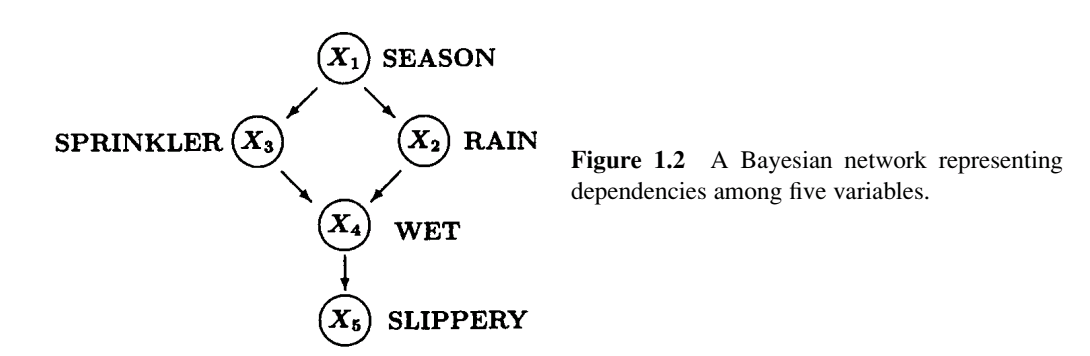

In [23]:
from collections import *
from itertools import *
from functools import *

import pymc3 as pm


def deterministic_map_categorical(name, dist, map: dict):
    # Note we assume the codomain of dist and the keys of map are the same.
    # e.g. if pm.Categorical may output 0...n-1, then map should have keys
    # for each of those.
    #
    # Note also that this is probably very inefficient for large maps.

    (_, expr), *rest = list(map.items())
    # Take the value for this key to be the default value. Since we
    # assume the dict is exhaustive of all possible values.
    for k, v in rest:
        expr = pm.math.switch(pm.math.eq(dist, k), v, expr)
    return pm.Deterministic(name, expr)

In [36]:

SPRING, SUMMER, FALL, WINTER = range(4)
with pm.Model() as unpooled_model:
    season = pm.Categorical('season', [1 / 4 for _ in range(4)])
    
    # Probability that it is raining at any given time, by season.
    rain_p = deterministic_map_categorical('rain_p', season, {
        SPRING: 0.2,
        SUMMER: 0.01,
        FALL: 0.2,
        WINTER: 0.5,
    })
    rain = pm.Bernoulli('rain', rain_p)   # 1=raining, 0=not

    sprinkler_p = deterministic_map_categorical('sprinkler_p', season, {
        SPRING: 1 / 24,  # 1 hour per day.
        SUMMER: 2 / 24,  # 2 hours per day.
        FALL: 1 / 24,  # 1 hour per day.
        WINTER: 0,  # Turned off in winter.
    })
    sprinkler = pm.Bernoulli('sprinkler', sprinkler_p)
    
    wet = pm.Deterministic("wet", pm.math.maximum(rain, sprinkler))

    # Randomly flips the result with probability 5%.
    noise = pm.Bernoulli('_', 0.05)
    
    slippery = pm.Deterministic(
        'slippery',
        pm.math.switch(noise, 1-wet, wet)
    )

    sample = pm.sample_prior_predictive(samples=1000)

In [39]:
sample

{'sprinkler': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0,